In [1]:
"""notebook to begin looking at the usm of various terms, and which one is dominant
This is so that we can understand how the dominance of each term"""

'notebook to begin looking at the usm of various terms, and which one is dominant\nThis is so that we can understand how the dominance of each term'

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
#load in compoenents of  heat budget
mT = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/EC-Earth3/climatology/EC_dtdt.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mua = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/EC-Earth3/climatology/EC_uadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mva = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/EC-Earth3/climatology/EC_vadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mwa = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/EC-Earth3/climatology/EC_wadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
mq = xr.open_dataarray('/home/z5113258/Documents/data/CMIP6/EC-Earth3/climatology/EC_qnet.nc').sel(lat=slice(-40,30),lon=slice(30,125))
#obs heat budget
gT = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_dtdt.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gua = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_uadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gva = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_vadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gwa = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_wadv.nc').sel(lat=slice(-40,30),lon=slice(30,125))
gq = xr.open_dataarray('/home/z5113258/Documents/GODAS/remapcon_1/climatology/GODAS_qnet.nc').sel(lat=slice(-40,30),lon=slice(30,125))

In [4]:
#Want to see which terms have the biggest differences between model and obs
#Fisrt the sum of terms, then compoenents (q, summed advection,residual).
sM = mq-(mua+mva+mwa)
sG = gq-(gua+gva+gwa)
sD = sM - sG

In [5]:
aM = -1*(mua+mva+mwa)
aG = -1*(gua+gva+gwa)
aD = aM - aG

In [6]:
lons = sD.lon
lats = sD.lat

In [7]:
def plot_background(ax, i, j):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 125., -30., 20.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5,)
    gl.top_labels = False
    gl.right_labels = False
    if i == 5:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    if j > 0:
        gl.left_labels = False
    return ax

In [8]:
def plot_var(vari, vmin, vmax, name):
    lons = vari.lon
    lats = vari.lat
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15), sharey='all', sharex='all', 
                                 subplot_kw={'projection':ccrs.PlateCarree()})
    for i in range(0,6):

        axes[i, 0].pcolormesh(lons, lats, (vari).sel(month = i+1), cmap = 'RdBu_r', 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,0], i, 0)
        mon = i+1
        axes[i, 0].set_title('Month = '+str(mon))
        #2nd collumn
        im = axes[i, 1].pcolormesh(lons, lats, (vari).sel(month = i+7), cmap = 'RdBu_r', 
                                    #colorbar=True, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,1], i, 1)
        mon2 = i+7
        axes[i, 1].set_title('Month = '+str(mon2))
    cbar_ax = fig.add_axes([0.95, 0.45, 0.05, 0.25])
    fig.colorbar(im, cax=cbar_ax)
    axes[0,0].text(1.5,1.3, name, va='bottom', ha='center', fontsize = 'x-large',
            rotation='horizontal', rotation_mode='anchor',
            transform=axes[0,0].transAxes)
    return fig

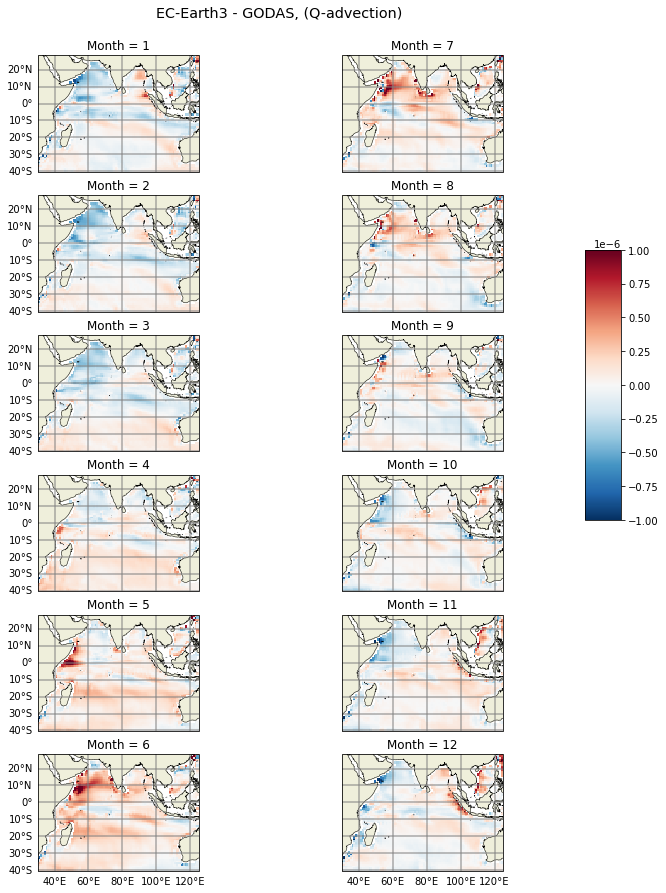

In [9]:
a = plot_var(sD, -1e-6, 1e-6, 'EC-Earth3 - GODAS, (Q-advection)')

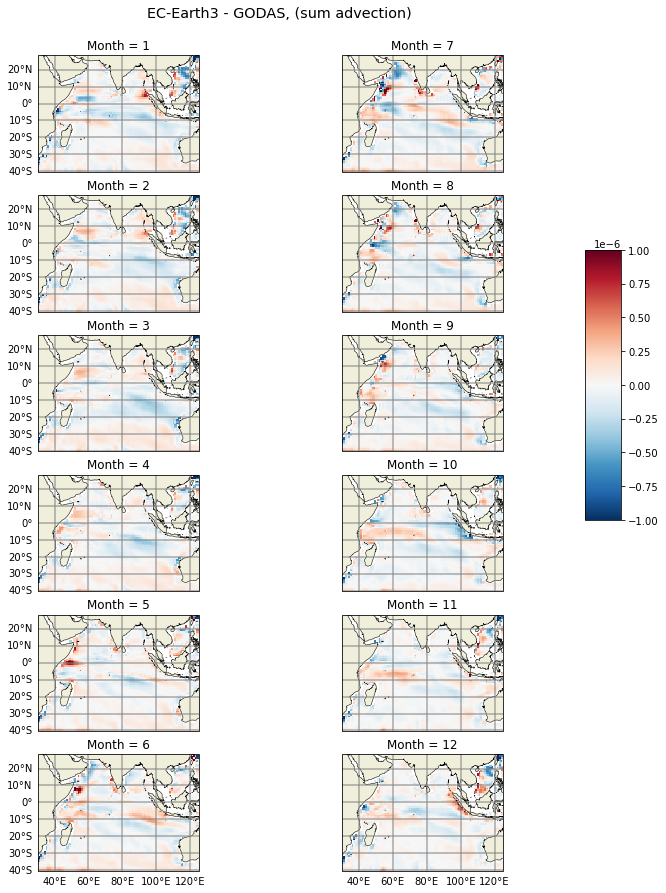

In [10]:
b = plot_var(aD, -1e-6, 1e-6, 'EC-Earth3 - GODAS, (sum advection)')

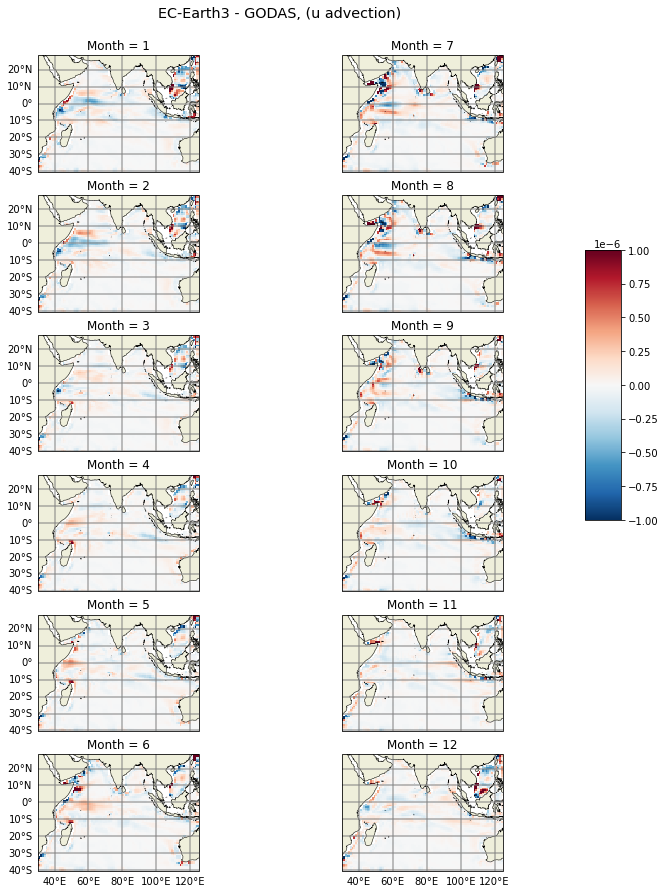

In [11]:
c = plot_var((-mua) - (-gua), -1e-6, 1e-6, 'EC-Earth3 - GODAS, (u advection)')

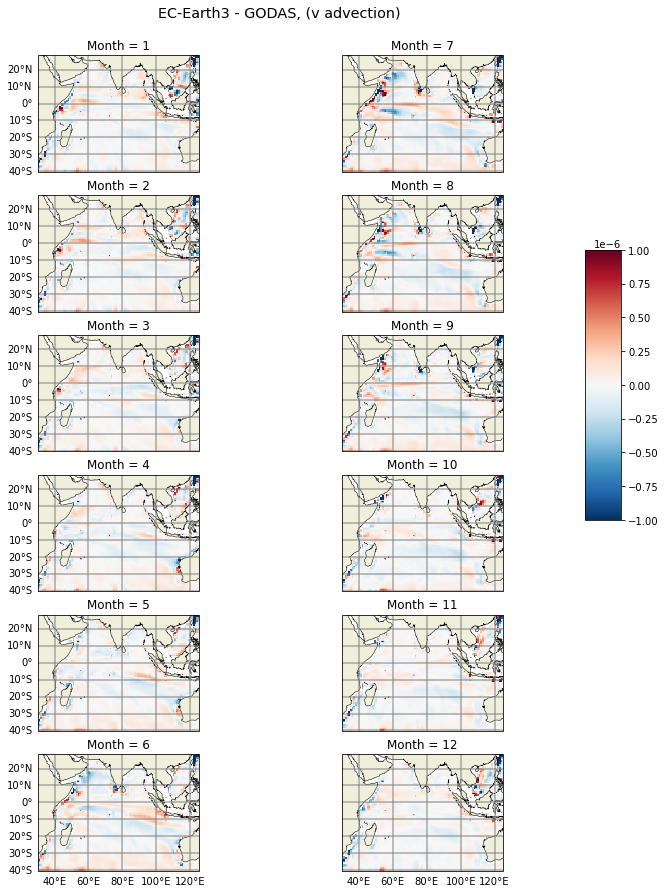

In [12]:
d = plot_var((-mva) - (-gva), -1e-6, 1e-6, 'EC-Earth3 - GODAS, (v advection)')

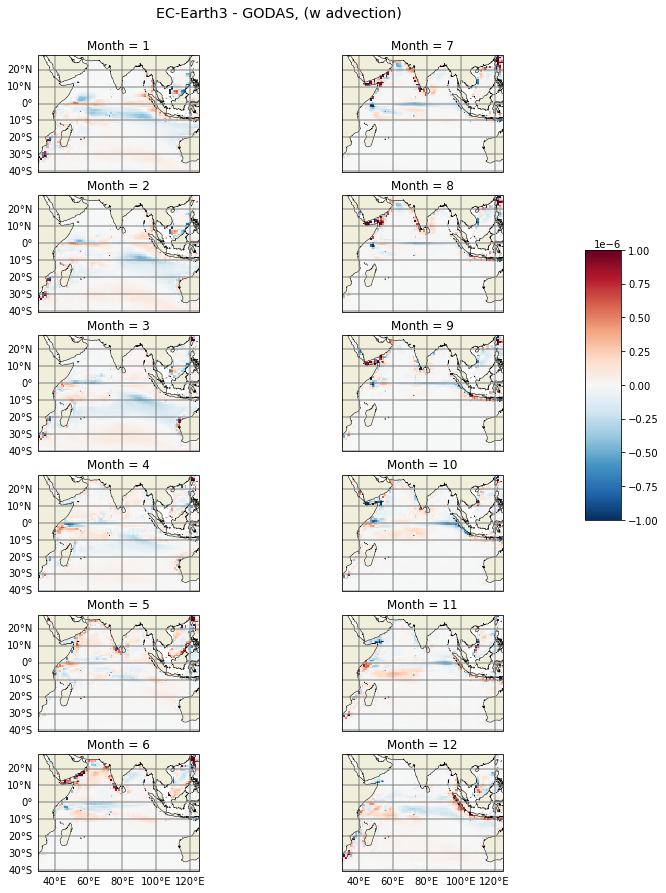

In [13]:
e = plot_var((-mwa) - (-gwa), -1e-6, 1e-6, 'EC-Earth3 - GODAS, (w advection)')